# Ford car data prediction

### Objectives
(A) Load the data, 
(B) Perform Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis) 
(C) Split the original dataset into the train set (80%) and the test set (20%), 
(D) Perform Linear Regression and Predict the 'Price' from the test set, 
(E) Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients) 
(F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable. 
(G) Compare the actual and predicted target variable through visualization

#### Data source:https://github.com/SKawsar/Data_Visualization_with_Python
Original data source:https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

###### Importing Libraries

In [590]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')

###### Importing and analyzing data 

In [591]:
df = pd.read_csv("ford.csv")

display(df.head(10))
print(df.shape)
print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


###### Label Encoding

In [592]:
print(df['model'].unique())
print(len(df['model'].unique()))
display(df['model'].value_counts())


[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
23


 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Transit Tourneo             1
 Escort                      1
 Ranger                      1
Name: model, dtype: int64

In [593]:
print(df['transmission'].unique())
print(len(df['transmission'].unique()))
display(df['transmission'].value_counts())

['Automatic' 'Manual' 'Semi-Auto']
3


Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

In [594]:
print(df['fuelType'].unique())
print(len(df['fuelType'].unique()))
display(df['fuelType'].value_counts())

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']
5


Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [595]:
LE = LabelEncoder()

In [596]:
df['transmission'] = LE.fit_transform(df['transmission'])
df['fuelType'] = LE.fit_transform(df['fuelType'])
df['model'] = LE.fit_transform(df['model'])
df['year'] = LE.fit_transform(df['year'])

df['transmission'] = df['transmission'].astype('category')
df['fuelType'] = df['fuelType'].astype('category')
df['model'] = df['model'].astype('category')
df['year'] = df['year'].astype('category')
display(df.head(10))
print(df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5,18,12000,0,15944,4,57.7,1.0
1,6,19,14000,1,9083,4,57.7,1.0
2,6,18,13000,1,12456,4,57.7,1.0
3,5,20,17500,1,10460,4,40.3,1.5
4,5,20,16500,0,1482,4,48.7,1.0
5,5,16,10500,1,35432,4,47.9,1.6
6,16,20,22500,1,2029,4,50.4,1.0
7,5,18,9000,1,13054,4,54.3,1.2
8,13,20,25500,0,6894,0,42.2,2.0
9,6,19,10000,1,48141,4,61.4,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         17964 non-null  category
 1   year          17964 non-null  category
 2   price         17964 non-null  int64   
 3   transmission  17964 non-null  category
 4   mileage       17964 non-null  int64   
 5   fuelType      17964 non-null  category
 6   mpg           17964 non-null  float64 
 7   engineSize    17964 non-null  float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 633.6 KB
None


###### One hot encoding

In [597]:
print(df.shape)
df = pd.get_dummies(df, drop_first=True)

display(df.sample(10))
print(df.shape)

(17964, 8)


,price,mileage,mpg,engineSize,model_1,model_2,model_3,model_4,model_5,model_6,...,year_18,year_19,year_20,year_21,transmission_1,transmission_2,fuelType_1,fuelType_2,fuelType_3,fuelType_4
2888,7160,40065,88.3,1.5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4603,7999,22484,54.3,1.2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1918,9780,8829,55.4,1.1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
13569,21769,169,50.4,1.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
11782,19100,12245,35.3,1.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
369,11298,1397,44.1,1.6,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
16078,19999,20260,38.2,1.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1596,12570,24479,54.3,1.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
13123,9000,26806,44.1,1.6,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4494,16950,11048,54.3,1.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


(17964, 53)


### One hot encoding is better for this data analysis because categorical variables (Model,transmisssion type,fuel type) in the dataset are not numerical.

In [598]:
target = ['price']

X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(17964, 52) (17964, 1)


###### Train and test set

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 52) (3593, 52) (14371, 1) (3593, 1)


###### Linear Regression & predicting the 'Price' from the test set

In [600]:
model = LinearRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_test)

       price
1087   16700
9367    9690
4705   10999
10336  29350
8509   11250
...      ...
14866  13487
11183  15299
13788   5495
17265   5685
16043  16495

[3593 rows x 1 columns]


###### Linear Regression Coefficients and intercept

In [601]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
27,year_3,-6.963092e+03
30,year_6,-4.814447e+03
28,year_4,-4.043758e+03
32,year_8,-3.388035e+03
26,year_2,-3.341272e+03
6,model_4,-3.271666e+03
14,model_12,-3.203214e+03
25,year_1,-2.623862e+03
33,year_9,-2.076106e+03
31,year_7,-1.925465e+03


A positive sign indicates that as the feature variable increases, the target variable also increases.                        
A negative sign indicates that as the feature variable increases, the target variable decreases.

In [602]:
model.intercept_

array([2729.13421311])

### MAE, MAPE, MSE, RMSE

In [603]:
y_pred = model.predict(X_test)

In [604]:
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)


mean absolute error =  1245.0870289652466
mean squared error =  2831583.433345413
root mean squared error =  1682.730945025203
coefficient of determination =  0.8747977488006435


## Comparing the actual and predicted target variable through visualization

#### Lineplot Comparing the actual and predicted target variable

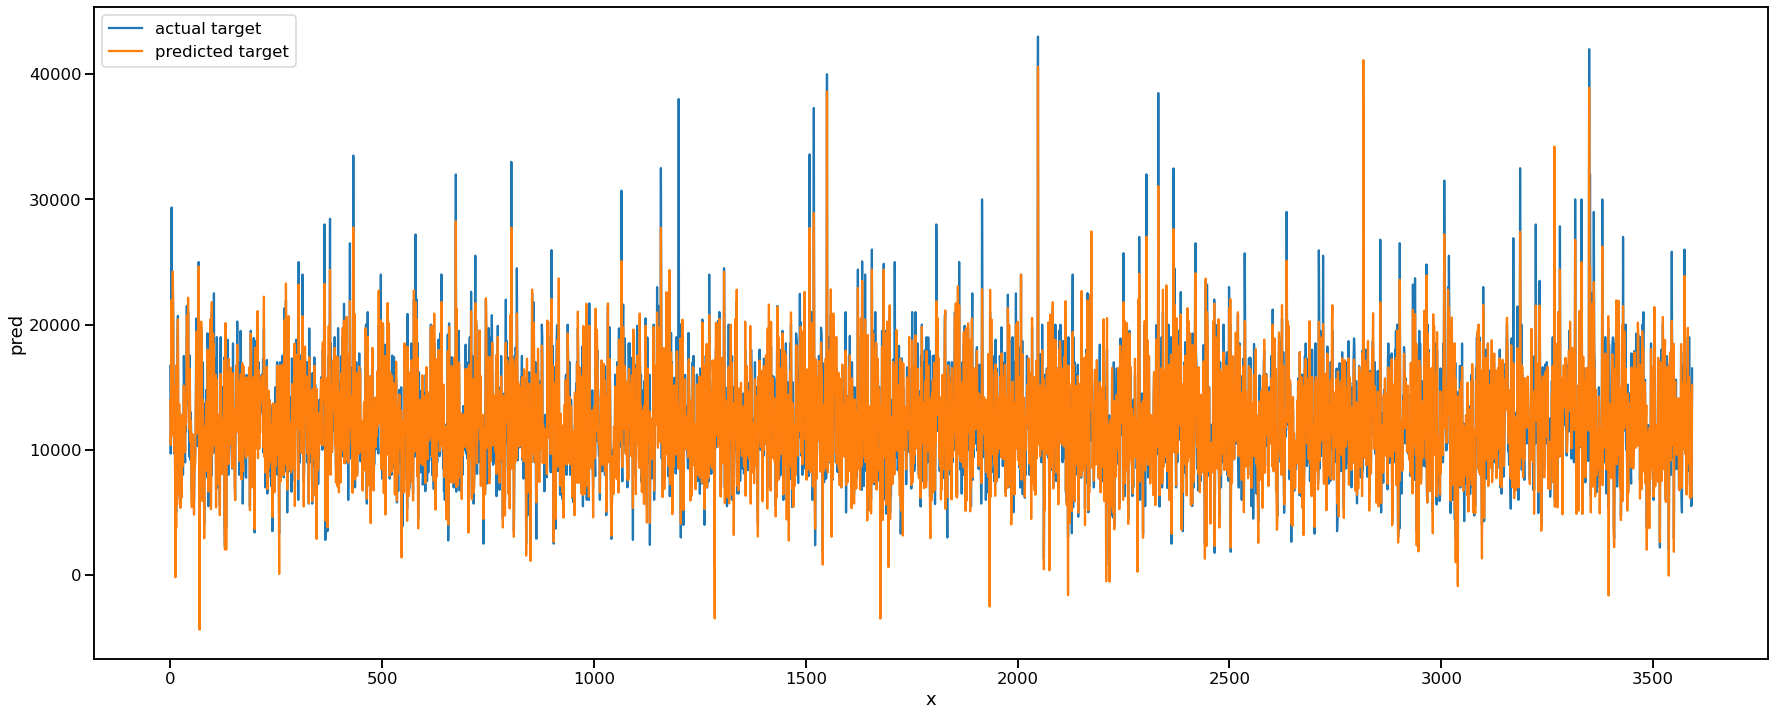

In [605]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()


#### Scatterplot Comparing the actual and predicted target variable

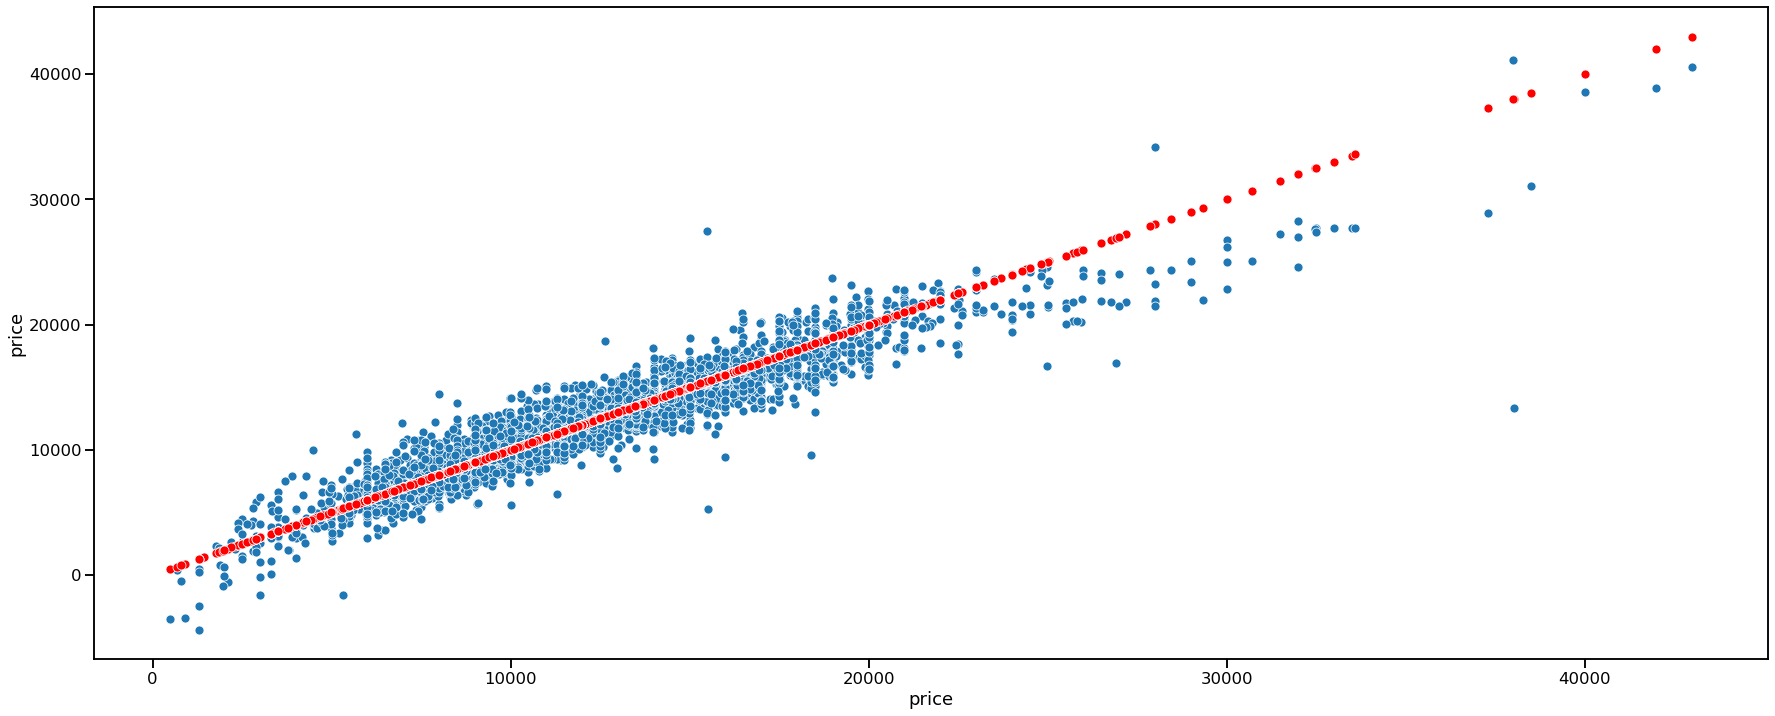

In [606]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()